# **THIS FILE IS FOR FOCUSING ONLY ON TIME SERIES AND MAKING INFERENCES FROM THE TRANSACTION FILE SINCE WE COULD NOT OBTAIN ANYTHING WITH THE FEATURES WE OBTAINED FROM THE CATALOG PRODUCT FILE.**

## Display Datasets

In [1]:
import pandas as pd
transactions_df = pd.read_csv('transactions.csv')
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'])
transactions_df

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1
...,...,...,...,...
1071533,22114,29567,2021-01-31,2
1071534,22114,21068,2021-01-31,1
1071535,10900,18270,2021-01-31,1
1071536,17894,31265,2021-01-31,5


In [2]:
catalog_df = pd.read_csv('product_catalog.csv')
catalog_df

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


In [3]:
category_map_df = pd.read_csv('product_category_map.csv')
category_map_df

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


In [4]:
test_df = pd.read_csv('test.csv')
test_df

,id,customer_id,product_id,prediction
0,0,0,20664,NaN
1,1,0,28231,NaN
2,2,13,2690,NaN
3,3,15,1299,NaN
4,4,15,20968,NaN
...,...,...,...,...
9995,9995,46118,20106,NaN
9996,9996,46124,19677,NaN
9997,9997,46125,12878,NaN
9998,9998,46127,7963,NaN


## Labels

In [5]:
# Now let's modify our original code to handle this case
transactions_df = transactions_df.sort_values(['customer_id', 'product_id', 'purchase_date'])
transactions_df['days_until_next_purchase'] = abs(
    transactions_df.sort_values(['customer_id', 'product_id', 'purchase_date'])
    .groupby(['customer_id', 'product_id'])['purchase_date']
    .diff(-1)  # Using -1 to get the difference with the next row
    .dt.days   # Convert timedelta to days
)

transactions_df

,customer_id,product_id,purchase_date,quantity,days_until_next_purchase
390966,0,1505,2020-09-01,1,NaN
819667,0,6446,2020-12-11,1,35.0
978365,0,6446,2021-01-15,1,NaN
709719,0,9325,2020-11-20,1,NaN
268197,0,12468,2020-08-03,1,NaN
...,...,...,...,...,...
995072,46137,22403,2021-01-18,1,NaN
1069936,46137,22583,2021-01-31,1,NaN
287156,46137,28343,2020-08-08,1,NaN
287097,46137,28900,2020-08-08,2,NaN


In [6]:
display(transactions_df['purchase_date'].min())
display(transactions_df['purchase_date'].max())

Timestamp('2020-06-01 00:00:00')

Timestamp('2021-01-31 00:00:00')

In [7]:
transactions_df['since_purchase'] = (transactions_df['purchase_date'].max() - transactions_df['purchase_date']).dt.days
transactions_df

,customer_id,product_id,purchase_date,quantity,days_until_next_purchase,since_purchase
390966,0,1505,2020-09-01,1,NaN,152
819667,0,6446,2020-12-11,1,35.0,51
978365,0,6446,2021-01-15,1,NaN,16
709719,0,9325,2020-11-20,1,NaN,72
268197,0,12468,2020-08-03,1,NaN,181
...,...,...,...,...,...,...
995072,46137,22403,2021-01-18,1,NaN,13
1069936,46137,22583,2021-01-31,1,NaN,0
287156,46137,28343,2020-08-08,1,NaN,176
287097,46137,28900,2020-08-08,2,NaN,176


predict = ceil((days_until_next_purchase(y) - since_purchase) // 7)  if > 4: 0 
                how many days later for next purchase                   if it takes more than 4 weeks then it would not be purchased
                from today

In [8]:
transactions_df[transactions_df['customer_id'] == 0][transactions_df['product_id'] ==  20664]

/var/folders/pl/3_w423lx1r778r95c5qh9ylm0000gn/T/ipykernel_2305/476532270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transactions_df[transactions_df['customer_id'] == 0][transactions_df['product_id'] ==  20664]


,customer_id,product_id,purchase_date,quantity,days_until_next_purchase,since_purchase
22146,0,20664,2020-06-05,1,126.0,240
540881,0,20664,2020-10-09,1,63.0,114
819668,0,20664,2020-12-11,1,NaN,51


## Product Based Features

### Knn Clustering from product_catalog

In [9]:
"""
knn_merged_data = pd.read_csv('knn_merged_data.csv')
knn_merged_data
"""

"\nknn_merged_data = pd.read_csv('knn_merged_data.csv')\nknn_merged_data\n"

In [10]:
"""
transactions_df['knn_cluster']=knn_merged_data['knn_cluster']
transactions_df.drop(columns=['knn_cluster'],inplace=True) # I changed my mind because its unnecessary
"""

"\ntransactions_df['knn_cluster']=knn_merged_data['knn_cluster']\ntransactions_df.drop(columns=['knn_cluster'],inplace=True) # I changed my mind because its unnecessary\n"

In [11]:
"""
display(knn_merged_data[(knn_merged_data['product_id'] == 29567)&(knn_merged_data['customer_id'] == 22114)])
display(transactions_df[(transactions_df['product_id']==29567)&(transactions_df['customer_id']==22114)])
"""

"\ndisplay(knn_merged_data[(knn_merged_data['product_id'] == 29567)&(knn_merged_data['customer_id'] == 22114)])\ndisplay(transactions_df[(transactions_df['product_id']==29567)&(transactions_df['customer_id']==22114)])\n"

## Customer Based Features

In [12]:
# average quantity per product
avg_qty_per_product = (
    transactions_df
    .groupby("product_id")["quantity"]
    .mean()
    .reset_index(name="avg_quantity")
)


# Add a new column for standard deviation of quantity per product
std_qty_per_product = (
    transactions_df
    .groupby("product_id")["quantity"]
    .std()
    .reset_index(name="std_quantity")
)   

print(avg_qty_per_product)
print(std_qty_per_product)


       product_id  avg_quantity
0               0      1.000000
1               1      1.666667
2               2      1.000000
3               3      2.000000
4               4      4.400000
...           ...           ...
31751       32770      1.166667
31752       32771      2.000000
31753       32772      1.000000
31754       32773      1.000000
31755       32775      1.000000

[31756 rows x 2 columns]
       product_id  std_quantity
0               0           NaN
1               1      1.118034
2               2           NaN
3               3      2.000000
4               4      4.277850
...           ...           ...
31751       32770      0.408248
31752       32771           NaN
31753       32772      0.000000
31754       32773           NaN
31755       32775      0.000000

[31756 rows x 2 columns]


In [13]:
# Her müşteri için ziyaret günlerini benzersiz olarak al
unique_visits = (
    transactions_df[['customer_id', 'purchase_date']]
    .drop_duplicates()
    .sort_values(by=['customer_id', 'purchase_date'])
)


# Ziyaretler arasındaki gün farkını hesapla
unique_visits['days_between_visits'] = (
    unique_visits.groupby('customer_id')['purchase_date']
    .diff()
    .dt.days
)


# Ortalama ve standart sapmayı hesapla
visit_stats = (
    unique_visits.groupby('customer_id')['days_between_visits']
    .agg(avg_days_between_visits='mean', std_days_between_visits='std')
    .reset_index()
)


visit_stats

,customer_id,avg_days_between_visits,std_days_between_visits
0,0,26.000000,18.013884
1,1,21.444444,14.292578
2,2,23.333333,12.708265
3,3,15.466667,12.899982
4,4,20.166667,14.389601
...,...,...,...
46133,46133,29.600000,23.501064
46134,46134,30.166667,12.859497
46135,46135,21.333333,16.165808
46136,46136,23.222222,12.940033


In [14]:
# Her müşteri ve ziyaret günü için benzersiz ürün sayısını hesapla
unique_items_per_visit = (
    transactions_df.groupby(['customer_id', 'purchase_date'])['product_id']
    .nunique()
    .reset_index(name='unique_items_per_visit')
)

# Ortalama ve standart sapmayı müşteri bazında hesapla
unique_items_stats = (
    unique_items_per_visit.groupby('customer_id')['unique_items_per_visit']
    .agg(avg_unique_items_per_visit='mean', std_unique_items_per_visit='std')
    .reset_index()
)

# Sonuçları göster
unique_items_stats

,customer_id,avg_unique_items_per_visit,std_unique_items_per_visit
0,0,1.800000,0.632456
1,1,1.500000,0.707107
2,2,2.100000,1.197219
3,3,2.500000,1.825742
4,4,1.769231,1.165751
...,...,...,...
46133,46133,4.166667,1.722401
46134,46134,4.142857,4.140393
46135,46135,1.750000,0.500000
46136,46136,3.500000,1.957890


In [15]:
"""
avg_days_diff_per_product = (
    transactions_sorted
    .groupby("product_id")["days_diff"]
    .mean()
    .reset_index(name="avg_days_between_purchases")
)

std_days_diff_per_product = (
    transactions_sorted
    .groupby("product_id")["days_diff"]
    .std()
    .reset_index(name="std_days_between_purchases")
)

print(avg_days_diff_per_product)
print(std_days_diff_per_product)
"""

'\navg_days_diff_per_product = (\n    transactions_sorted\n    .groupby("product_id")["days_diff"]\n    .mean()\n    .reset_index(name="avg_days_between_purchases")\n)\n\nstd_days_diff_per_product = (\n    transactions_sorted\n    .groupby("product_id")["days_diff"]\n    .std()\n    .reset_index(name="std_days_between_purchases")\n)\n\nprint(avg_days_diff_per_product)\nprint(std_days_diff_per_product)\n'

In [16]:
"""
# 1) Ürün ve tarih bazında sıralayalım
transactions_sorted = transactions_df.sort_values(["product_id", "purchase_date"])

# 2) Her ürün içinde "purchase_date" farklarını (bir satırın bir öncekine göre farkı) hesaplayalım
transactions_sorted["days_diff"] = transactions_sorted.groupby("product_id")["purchase_date"].diff().dt.days

# Artık "days_diff" sütununda, bir önceki satın alım ile bu satın alım arasında kaç gün olduğu yazar
print(transactions_sorted)
"""

'\n# 1) Ürün ve tarih bazında sıralayalım\ntransactions_sorted = transactions_df.sort_values(["product_id", "purchase_date"])\n\n# 2) Her ürün içinde "purchase_date" farklarını (bir satırın bir öncekine göre farkı) hesaplayalım\ntransactions_sorted["days_diff"] = transactions_sorted.groupby("product_id")["purchase_date"].diff().dt.days\n\n# Artık "days_diff" sütununda, bir önceki satın alım ile bu satın alım arasında kaç gün olduğu yazar\nprint(transactions_sorted)\n'

In [17]:
df_merged_quantity = pd.merge(
    avg_qty_per_product[['product_id', 'avg_quantity']], 
    std_qty_per_product[['product_id', 'std_quantity']], 
    on="product_id",
    how="inner")


df_merged_customer_based = pd.merge(
    unique_items_stats[['customer_id', 'avg_unique_items_per_visit', 'std_unique_items_per_visit']], 
    visit_stats[['customer_id', 'avg_days_between_visits', 'std_days_between_visits']], 
    on="customer_id", 
    how="inner")

In [18]:
transactions_df = pd.merge(transactions_df,df_merged_quantity, on="product_id", how="left")
transactions_df = pd.merge(transactions_df,df_merged_customer_based, on="customer_id", how="left")



transactions_df

,customer_id,product_id,purchase_date,quantity,days_until_next_purchase,since_purchase,avg_quantity,std_quantity,avg_unique_items_per_visit,std_unique_items_per_visit,avg_days_between_visits,std_days_between_visits
0,0,1505,2020-09-01,1,NaN,152,1.042254,0.263852,1.8,0.632456,26.000000,18.013884
1,0,6446,2020-12-11,1,35.0,51,1.016949,0.130189,1.8,0.632456,26.000000,18.013884
2,0,6446,2021-01-15,1,NaN,16,1.016949,0.130189,1.8,0.632456,26.000000,18.013884
3,0,9325,2020-11-20,1,NaN,72,1.285714,0.621994,1.8,0.632456,26.000000,18.013884
4,0,12468,2020-08-03,1,NaN,181,1.131148,0.386239,1.8,0.632456,26.000000,18.013884
...,...,...,...,...,...,...,...,...,...,...,...,...
1071533,46137,22403,2021-01-18,1,NaN,13,2.432432,1.806238,2.5,1.290994,58.666667,57.326550
1071534,46137,22583,2021-01-31,1,NaN,0,1.043478,0.206185,2.5,1.290994,58.666667,57.326550
1071535,46137,28343,2020-08-08,1,NaN,176,1.000000,0.000000,2.5,1.290994,58.666667,57.326550
1071536,46137,28900,2020-08-08,2,NaN,176,1.345982,0.597109,2.5,1.290994,58.666667,57.326550


In [19]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071538 entries, 0 to 1071537
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   customer_id                 1071538 non-null  int64         
 1   product_id                  1071538 non-null  int64         
 2   purchase_date               1071538 non-null  datetime64[ns]
 3   quantity                    1071538 non-null  int64         
 4   days_until_next_purchase    175112 non-null   float64       
 5   since_purchase              1071538 non-null  int64         
 6   avg_quantity                1071538 non-null  float64       
 7   std_quantity                1064149 non-null  float64       
 8   avg_unique_items_per_visit  1071538 non-null  float64       
 9   std_unique_items_per_visit  1070613 non-null  float64       
 10  avg_days_between_visits     1070613 non-null  float64       
 11  std_days_between_visits 

In [20]:
dropped_version = transactions_df.drop(columns=['purchase_date'])
dropped_version

dropped_version.to_csv('transactions_preprocessed.csv', index=False)

In [21]:
data = dropped_version.copy()
dropped_version.to_csv('transactions_preprocessed.csv', index=False)


## Model

### Libraries

In [22]:
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor

import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Prepare the data

In [23]:
# 1. Eğitim ve test setlerini ayır
train_data = data[data['days_until_next_purchase'].notna()]  # NaN olmayanlar (eğitim seti)
test_data = data[data['days_until_next_purchase'].isna()]    # NaN olanlar (test seti)

test_data_filtered = pd.merge(
    test_data,
    test_df[['customer_id', 'product_id']],
    on=['customer_id', 'product_id'],
    how='inner'
)

# 2. Bağımsız ve bağımlı değişkenleri ayır
features = ["customer_id", "avg_quantity", "std_quantity", "avg_unique_items_per_visit", "std_unique_items_per_visit", "avg_days_between_visits", "std_days_between_visits"]

X_train = train_data[features]
y_train = train_data['days_until_next_purchase']

X_test = test_data_filtered[features]

# Eğitim ve test setlerinin boyutlarını kontrol et
train_size = X_train.shape[0]
test_size = X_test.shape[0]

train_size, test_size

(175112, 10000)

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Random Forest modelini oluştur
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğit
rf_model.fit(X_train, y_train)

# Test seti üzerindeki NaN değerleri tahmin et
y_pred_test = rf_model.predict(X_test)

# Tahmin edilen değerleri test setine ekle
test_data_filtered['days_until_next_purchase'] = y_pred_test

# Test setindeki tahmin edilen ilk birkaç satırı görüntüle
test_data_filtered.head()


,customer_id,product_id,quantity,days_until_next_purchase,since_purchase,avg_quantity,std_quantity,avg_unique_items_per_visit,std_unique_items_per_visit,avg_days_between_visits,std_days_between_visits
0,0,20664,1,91.046500,51,1.026316,0.239802,1.800000,0.632456,26.000000,18.013884
1,0,28231,2,35.226571,6,1.292683,0.558744,1.800000,0.632456,26.000000,18.013884
2,13,2690,1,67.040250,38,1.166667,0.408248,4.166667,2.367712,21.636364,14.725982
3,15,1299,1,42.163286,17,1.581699,0.970719,3.500000,1.605280,16.615385,8.170460
4,15,20968,1,40.375762,6,1.083333,0.453047,3.500000,1.605280,16.615385,8.170460


In [25]:
# Benzersiz değerlerin sayısı
unique_count = transactions_df['days_until_next_purchase'].nunique()
print(f"Unique values count: {unique_count}")

# Benzersiz değerlerin listesi
unique_values = transactions_df['days_until_next_purchase'].unique()
print(f"Unique values: {unique_values}")

# Değerlerin dağılımı (frekans tablosu)
value_counts = transactions_df['days_until_next_purchase'].value_counts()
print(value_counts)

Unique values count: 245
Unique values: [ nan  35. 126.  63.  21.  45.  20.  86. 124. 112.  61.  51.  50.  78.
  71. 131. 117.  84.  42. 205. 185.  60.  38. 140.  30. 119. 199.  79.
  56. 154.  68.  55. 201.  40. 111.  37. 203. 146.  81.  27.  19.  26.
 216.  62.  52.  99.  39.  28. 127. 104. 103.  74. 118.  64. 144. 122.
 151. 164.  33.  31.  75. 120.  15.  49.  59.  54. 130.  44.  25.  82.
 133.  66.  46. 128.  29.  85. 105.  22.  16.   7.  17.  10.   8.  12.
  14. 134. 198.  76. 149. 220.  87.  77. 110.  69.  80. 161.   1.  41.
  34. 190.  88.   9.  90.  32.  47.  72.  98. 162.  97. 155. 137.  43.
   3. 123.  67. 195. 176. 169.  70. 113. 116.  13.  53.  36.  23.  94.
 109. 139. 107. 196. 159.   5.  89.  24.  48.  96.   4. 160. 150. 108.
  83. 115.  95. 114. 135. 210.  58. 173. 181.  65. 166. 102. 177. 197.
  11. 193. 168. 167. 175.  73. 178. 217. 101. 132. 221. 138. 125. 136.
 182.   2. 218. 179. 141. 207. 129.  93. 158. 174. 184. 171. 145.   0.
 152. 170.  18. 143.  57. 153. 215. 1

In [26]:
import math
# Yeni sütun hesaplama mantığı
transactions_df['predicted_weeks_until_next_purchase'] = transactions_df.apply(
    lambda row: math.ceil((row['days_until_next_purchase'] - row['since_purchase']) / 7)
    if (row['days_until_next_purchase'] - row['since_purchase']) > 0 else 0,
    axis=1
)

# Eğer tahmin 4 haftadan fazlaysa, 0 olarak ayarla
transactions_df['predicted_weeks_until_next_purchase'] = transactions_df['predicted_weeks_until_next_purchase'].apply(
    lambda x: 0 if x > 4 else x
)


# Benzersiz değerlerin sayısı
unique_count = transactions_df['predicted_weeks_until_next_purchase'].nunique()
print(f"Unique values count: {unique_count}")

# Benzersiz değerlerin listesi
unique_values = transactions_df['predicted_weeks_until_next_purchase'].unique()
print(f"Unique values: {unique_values}")

# Değerlerin dağılımı (frekans tablosu)
value_counts = transactions_df['predicted_weeks_until_next_purchase'].value_counts()
print(value_counts)


Unique values count: 1
Unique values: [0]
predicted_weeks_until_next_purchase
0    1071538
Name: count, dtype: int64


### XGBoost

In [27]:
# setting parameters

xgb_params = {
    'max_depth': 6,
    'learning_rate': 0.01,
    'n_estimators': 2000,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    
    # Additional notes for better performance: 
    'n_jobs': -1                      # utilize all CPU cores
}

In [28]:
import xgboost as xgb

model = XGBRegressor(**xgb_params)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
# predict nan values on test set
y_pred_test_xgb = model.predict(X_test)

# add predicted values to test set
test_data_filtered['days_until_next_purchase'] = y_pred_test_xgb

# display first few rows of predicted test set
test_data_filtered.head()


,customer_id,product_id,quantity,days_until_next_purchase,since_purchase,avg_quantity,std_quantity,avg_unique_items_per_visit,std_unique_items_per_visit,avg_days_between_visits,std_days_between_visits
0,0,20664,1,83.000900,51,1.026316,0.239802,1.800000,0.632456,26.000000,18.013884
1,0,28231,2,63.089409,6,1.292683,0.558744,1.800000,0.632456,26.000000,18.013884
2,13,2690,1,80.782661,38,1.166667,0.408248,4.166667,2.367712,21.636364,14.725982
3,15,1299,1,48.009869,17,1.581699,0.970719,3.500000,1.605280,16.615385,8.170460
4,15,20968,1,57.236877,6,1.083333,0.453047,3.500000,1.605280,16.615385,8.170460


In [30]:
# predict on training set
y_pred_train = model.predict(X_train)

# calculate RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Train RMSE: {rmse_train}")

Train RMSE: 42.92228252873279


<Axes: >

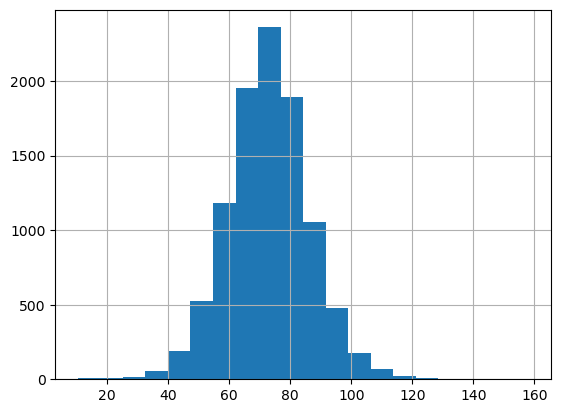

In [31]:
test_data_filtered['days_until_next_purchase'].hist(bins=20)

In [32]:
import numpy as np

def convert_days_to_weeks(row):
    days_until = row['days_until_next_purchase']  # Tahmin edilen günler
    since_purchase = row['since_purchase']  # Son satın almadan bu yana geçen günler
    
    # Gün tahminlerini haftaya çevirme ve koşulları uygulama
    weeks = np.ceil((days_until - since_purchase) / 7)
    # Negatif değerler için 1 döndür
    if weeks < 0:
        return 4
    # 4 haftadan büyük değerler için 0 döndür
    elif weeks > 4:
        return 0
    # 0-4 arasında ise haftalık değeri döndür
    return int(weeks)

test_data_filtered['weeks_until_next_purchase'] = test_data_filtered.apply(convert_days_to_weeks, axis=1)

### SVM

In [33]:
# X_train içinde hangi sütunda NaN değer olduğunu bul

nan_counts = X_train.isna().sum()
nan_counts

X_train['std_days_between_visits'].fillna(0, inplace=True)

nan_counts_test = X_test.isna().sum()


nan_counts_test

X_test['std_days_between_visits'].fillna(0, inplace=True)

/var/folders/pl/3_w423lx1r778r95c5qh9ylm0000gn/T/ipykernel_2305/1556598717.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['std_days_between_visits'].fillna(0, inplace=True)
/var/folders/pl/3_w423lx1r778r95c5qh9ylm0000gn/T/ipykernel_2305/1556598717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['std_days_between_visits

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. SVM modelini tanımlama ve eğitme
svm_model = SVR(kernel='linear', C=1.0)  # Lineer çekirdekli SVR modeli
svm_model.fit(X_train_scaled, y_train)

# 3. Tahmin yapma
y_pred = svm_model.predict(X_test_scaled)

# 4. Performansı değerlendirme (eğitim seti üzerinden)
y_train_pred = svm_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

# RMSE hesaplama
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")

print(f"Training MSE: {mse}")
print(f"Training MAE: {mae}")

# 5. Tahminleri test setine ekleme
test_data_filtered['predicted_days_until_next_purchase'] = y_pred

# Tahmin edilen test setini ve sonuçları kontrol et


In [176]:
test_data_filtered['predicted_days_until_next_purchase']

0       68.296671
1       66.396542
2       62.845932
3       49.093962
4       52.775233
          ...    
9995    53.494851
9996    53.907927
9997    99.527006
9998    65.268900
9999    61.791202
Name: predicted_days_until_next_purchase, Length: 10000, dtype: float64

array([[<Axes: title={'center': 'predicted_days_until_next_purchase'}>]],
      dtype=object)

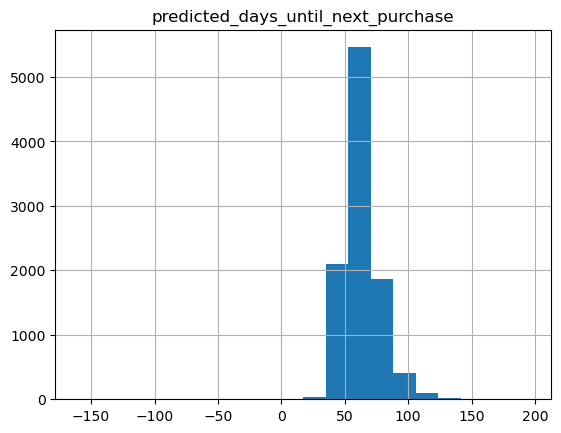

In [177]:
test_data_filtered.hist(column='predicted_days_until_next_purchase', bins=20)

### Cross Validation (5 fold) for SVM

In [189]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5-Fold Cross-Validation için KFold tanımlama
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation'da RMSE ve MAE hesaplama
rmse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train):
    # Eğitim ve doğrulama setlerini oluştur
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Veriyi ölçeklendir
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Modeli eğit
    svm_model = SVR(kernel='linear', C=1.0)
    svm_model.fit(X_train_fold_scaled, y_train_fold)

    # Doğrulama setinde tahmin yap
    y_val_pred = svm_model.predict(X_val_fold_scaled)

    # RMSE ve MAE hesapla
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    mae = mean_absolute_error(y_val_fold, y_val_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)

# RMSE ve MAE'nin ortalamasını yazdır
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")

Average RMSE: 46.38778050237765
Average MAE: 34.82279451414199


In [190]:
rmse_scores

[46.43766073930027,
 46.31770227406885,
 46.35363226294052,
 46.44156268293734,
 46.38834455264125]

In [122]:
test_data = test_data.drop(columns=['quantity', 'since_purchase', 'knn_cluster', 'avg_quantity', 'avg_days_between_purchases', 'days_until_next_purchase'])

# Öncelikle eşleşmeyi kolaylaştırmak için her iki DataFrame'de de 'customer_id' ve 'product_id' üzerinden birleştirme yapacağız.

# Eşleştirme için test_data'dan bir dictionary oluştur
mapping_dict = test_data.set_index(['customer_id', 'product_id'])['weeks_until_next_purchase'].to_dict()

# 'prediction' sütunundaki NaN değerlerini mapping_dict kullanarak doldur
test_csv['prediction'] = test_csv.apply(
    lambda row: mapping_dict.get((row['customer_id'], row['product_id']), row['prediction']), axis=1
)

In [123]:
test_csv = test_csv.to_csv('new.csv', index=False)